<a href="https://colab.research.google.com/github/hilmisyarif406/price-predict/blob/main/%5BMuhammad_Hilmi_Syarif%5D_Tugas_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Preparation

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mount Drive
from google.colab import drive
import os

drive.mount('/content/gdrive/')

path = '/content/gdrive/MyDrive/ICON x DSI/'
os.listdir(path)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


['toyota.csv', 'titanic.csv', 'hr.db', 'covid.csv']

In [ ]:
#Load Data
rgr_df = pd.read_csv(path+'toyota.csv')
rgr_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


# 2 - EDA

In [ ]:
import seaborn as sns

In [ ]:
rgr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
rgr_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
rgr_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
#kategori berdasarkan price
rgr_df['price_category']= ' '
for i in range(0, len(rgr_df['price']), 1):
  if rgr_df['price'].iloc[i] >= 0 and rgr_df['price'].iloc[i] <= 20000:
     rgr_df['price_category'].iloc[i] = 'cheap'
  elif rgr_df['price'].iloc[i] >= 20001 and rgr_df['price'].iloc[i] <= 40000:
    rgr_df['price_category'].iloc[i] = 'middle'
  else:
    rgr_df['price_category'].iloc[i] = 'expensive'

rgr_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_category
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,cheap
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,cheap
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,cheap
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,cheap
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,cheap


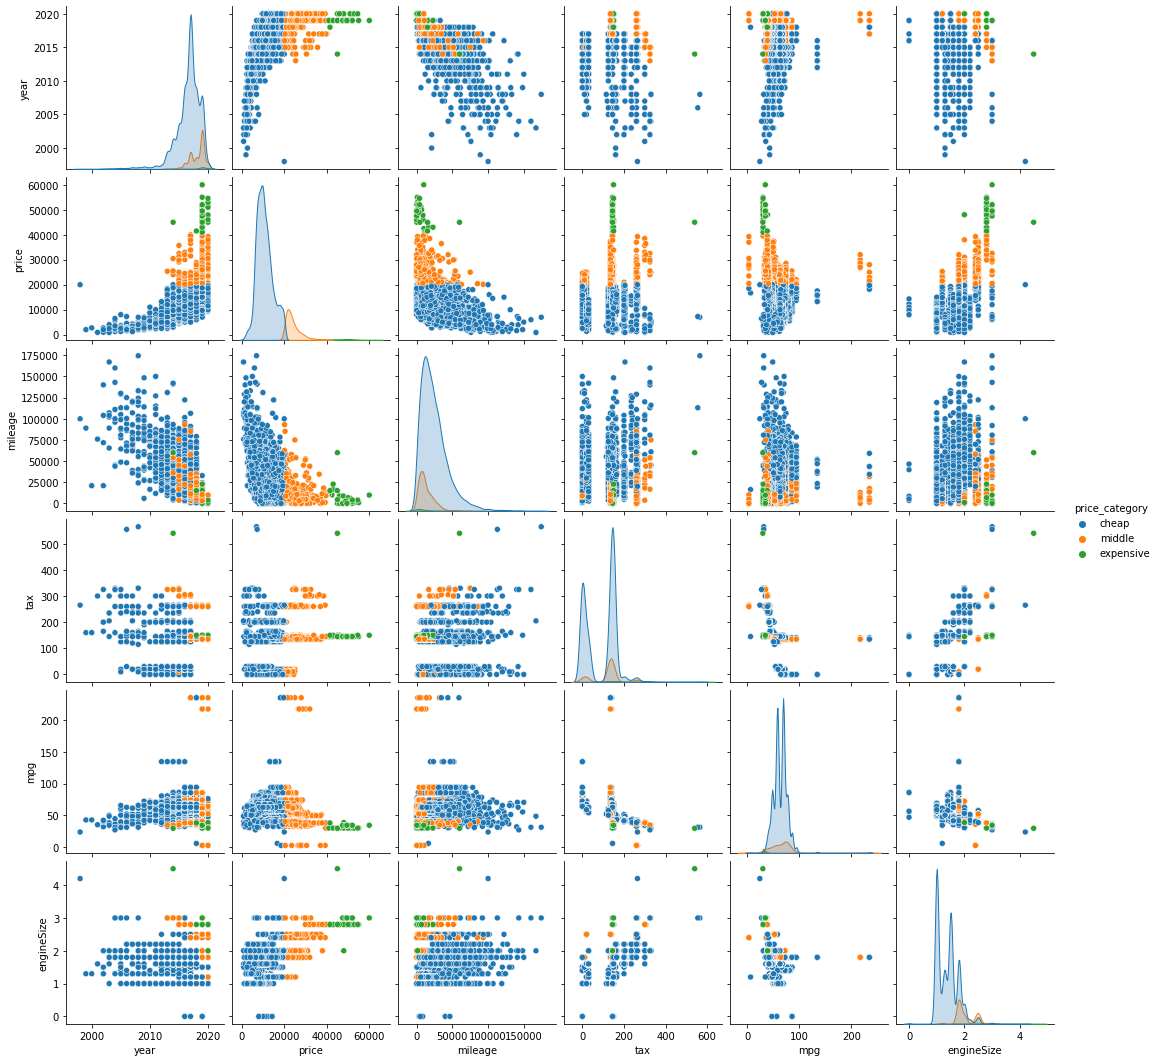

In [ ]:
sns.pairplot(rgr_df, hue='price_category')

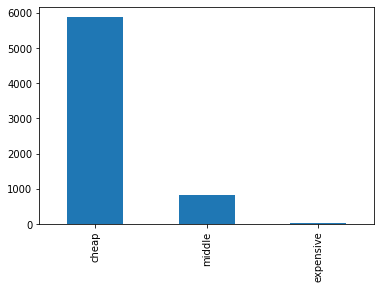

In [ ]:
rgr_df['price_category'].value_counts().plot(kind='bar')

# 3 - Model Building

## 3.1 - Make Model Prediction

In [ ]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#initiate algorithm
rgr = LinearRegression()

In [ ]:
#split data
x_train, x_test, y_train, y_test = train_test_split(
    rgr_df.drop(columns=['price_category','price']),
    rgr_df['price'],
    test_size=0.3,
    shuffle=True)

In [ ]:
#inititate encoder for data type 'category'
onehot_encode = OneHotEncoder(handle_unknown = 'ignore')

In [ ]:
#create pipeline
model = Pipeline(
    [('onehot', onehot_encode), 
     ('regression', rgr)])

In [ ]:
#model fit
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('onehot',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## 3.2 - Model Evalutaion

In [ ]:
#checking model prediction
from sklearn.metrics import accuracy_score
hasil_predict = model.predict(x_test)

In [ ]:
#create function MSE
def manual_mse(y_true, y_pred) -> np.array:
  return np.sum(
      (np.array(y_true) - np.array(y_pred))**2/len(y_true))

In [ ]:
print(manual_mse(y_test, hasil_predict))

5365673.975933587


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, hasil_predict))

5365673.975933588


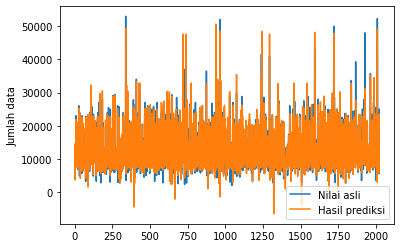

In [ ]:
plt.plot(list(y_test), label="Nilai asli")
plt.plot(list(hasil_predict), label="Hasil prediksi")

plt.legend(loc='lower right')
plt.ylabel('Jumlah data')

plt.show()

# 4 - Model Deployment

In [ ]:
#export model
from joblib import dump

dump(model, '[Muhammad Hilmi Syarif]_Tugas_Week_2.pkl')

['[Muhammad Hilmi Syarif]_Tugas_Week_2.pkl']

In [ ]:
#create app
import streamlit as st

from pyngrok import ngrok
from joblib import load

trained_model = load('[Muhammad Hilmi Syarif]_Tugas_Week_2.pkl')

form = st.form(key='my-form')

model = form.selectbox('Masukkan Model Mobil: ', options=['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR', 'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACE VERSO', 'Land Cruiser','Supra','Camry','Verso-S','IQ',' Urban Cruiser'])
year = form.slider("Masukkan tahun: ",min_value=1998, max_value=2020)
transmisi = form.selectbox("Masukkan transmisi: ", options=['Manual', 'Automatic', 'Semi-Auto', 'Other'])
mileage = form.number_input("Masukkan Mil: ", format='%d')
fuel = form.selectbox("Masukkan fuel: ", options=['Petrol', 'Other', 'Hybrid', 'Diesel'])
tax = form.number_input("Masukkan Tax: ", format='%d')
mpg = form.number_input("Masukkan Mpg: ")
engine = form.number_input("Masukkan engine: ")

submit = form.form_submit_button("Predict!")

if submit:
    final = trained_model.predict([[
        str(model),
        int(year),
        str(transmisi),
        int(mileage),
        str(fuel),
        int(tax),
        float(mpg),
        float(engine)]])
    st.write("Hasil Predict: ")
    st.write("Harga ", final[0])

ngrok_tunnel = ngrok.connect(8501)
print('Public URL: ', ngrok_tunnel.public_url)


2021-10-23 17:34:11.995 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2021-10-23 17:34:12.001 Opening tunnel named: http-8501-0231b07d-dca2-44f9-9710-7876d96ed2b3
2021-10-23 17:34:12.043 t=2021-10-23T17:34:12+0000 lvl=info msg="no configuration paths supplied"
2021-10-23 17:34:12.046 t=2021-10-23T17:34:12+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-10-23 17:34:12.048 t=2021-10-23T17:34:12+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-10-23 17:34:12.049 t=2021-10-23T17:34:12+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-10-23 17:34:12.282 t=2021-10-23T17:34:12+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-10-23 17:34:12.284 t=2021-10-23T17:34:12+0000 lvl=info msg="client session established" obj=csess id=5ef72f9b45d6
2021-10-23 17:34:12.294 t=2021-10-23T17:34:12+0000 lvl=info msg=start pg=/api/tu

Public URL:  http://bca5-35-233-216-174.ngrok.io


2021-10-23 17:34:12.462 t=2021-10-23T17:34:12+0000 lvl=info msg=end pg=/api/tunnels id=351a2a8d7818bc9d status=201 dur=148.756915ms
2021-10-23 17:34:12.464 t=2021-10-23T17:34:12+0000 lvl=info msg=start pg="/api/tunnels/http-8501-0231b07d-dca2-44f9-9710-7876d96ed2b3 (http)" id=4c0daef26bc34cd2
2021-10-23 17:34:12.467 t=2021-10-23T17:34:12+0000 lvl=info msg=end pg="/api/tunnels/http-8501-0231b07d-dca2-44f9-9710-7876d96ed2b3 (http)" id=4c0daef26bc34cd2 status=200 dur=250.521µs


In [ ]:
#run app
!streamlit run [Muhammad_Hilmi_Syarif]_Tugas_Week_2.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.233.216.174:8501

2021-10-23 17:35:04.083 Opening tunnel named: http-8501-f7540df5-cef9-49c0-b438-9fe0cb473559
2021-10-23 17:35:04.109 t=2021-10-23T17:35:04+0000 lvl=info msg="no configuration paths supplied"
2021-10-23 17:35:04.110 t=2021-10-23T17:35:04+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-10-23 17:35:04.111 t=2021-10-23T17:35:04+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-10-23 17:35:04.111 t=2021-10-23T17:35:04+0000 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040
2021-10-23 17:35:04.111 t=2021-10-23T17:35:04+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4041
2021-10-23 17:35:04.343 t=2021-10-23T17:35:04+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-10-23 17:35:04.343 t=2021-10-23T17:35

2021-10-23 17:35:57.447 t=2021-10-23T17:35:57+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"
2021-10-23 17:35:57.450 t=2021-10-23T17:35:57+0000 lvl=info msg="session closing" obj=tunnels.session err=nil


2021-10-23 17:35:57.451 t=2021-10-23T17:35:57+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"
2021-10-23 17:35:57.452 t=2021-10-23T17:35:57+0000 lvl=info msg="session closing" obj=tunnels.session err=nil
  Stopping...


In [ ]:
# Muhammad Hilmi Syarif
# Universitas Singaperbangsa Karawang
# 2018
# Weekly Challenge 2 Data Science Academy